In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astrometry_tools as at
import csv

In [2]:
# Load catalogs
# HSC
# The original catalog is too big to be stored on the git repo. Download the catalog or use my reduced catalog:
# hsc_cat = np.loadtxt('./COSMOS_s18a_dud_forced_starcatalog.csv', delimiter = ',', dtype = str) #Original full catalog
# Replace filename by 'COSMOS_s16a_udeep_forced_starcatalog.csv' for pretty plots of HSC 2016 release.
hsc_cat = np.loadtxt('./Catalog_HSC.csv', dtype = str)#reduced catalog with astrometry only
# HST
#hst_cat = np.loadtxt('./astrometry_acs_iphot_sep07_9441.txt', dtype = str) #Same as for HSC, file too big
hst_cat = np.loadtxt('./Catalog_HST.csv', dtype = str)
# Reference gaia catalog
gaia_cat = np.loadtxt('./Gaia_data_cosmos_dr2.csv', delimiter = ',', dtype = str)


# Positions from these catalogs in ra-dec
ra_pos = np.where(hst_cat[0,:]=='ra|')
dec_pos = np.where(hst_cat[0,:]=='dec|')

ra_hsc = hsc_cat[:,0].astype(float)
dec_hsc = hsc_cat[:,1].astype(float)

ra_hst = hst_cat[:,0].astype(float)
dec_hst = hst_cat[:,1].astype(float)

ra_gaia = gaia_cat[1:,1].astype(float)
dec_gaia = gaia_cat[1:,3].astype(float)

# Make coordinates arrays
coord_hst = np.array([ra_hst, dec_hst]).T
coord_gaia = np.array([ra_gaia, dec_gaia]).T
coord_hsc = np.array([ra_hsc, dec_hsc]).T

/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


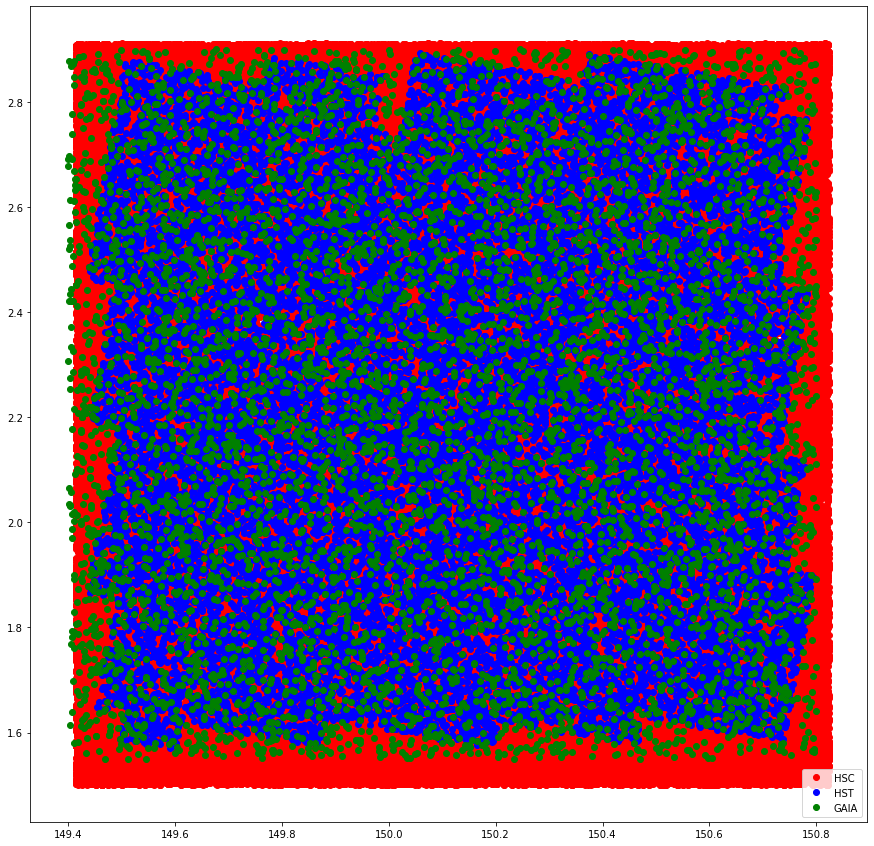

In [3]:
# Positions of stars in each survey
plt.figure(figsize = (15,15))
plt.plot(ra_hsc, dec_hsc, 'or', label = 'HSC')
plt.plot(ra_hst, dec_hst, 'ob', label = 'HST')
plt.plot(ra_gaia, dec_gaia, 'og', label = 'GAIA')
plt.legend()
plt.show()

In [4]:
# We are going to look for stars which positions correspond to one another between survey. 
# This is the search radius to attribute corresponding stars.
radius = 1./3600.*0.5 #Search radius

In [5]:
# Compute distances
print('HST vs HSC')
modulus_tc, angle_tc, v_coord_tc, garbage_tc, xerr_tc, yerr_tc = at.get_distances(coord_hst, coord_hsc, radius)
print('HST vs gaia')
modulus_tg, angle_tg, v_coord_tg, garbage_tg, xerr_tg, yerr_tg = at.get_distances(coord_gaia, coord_hst, radius)
print('HSC vs gaia')
modulus_cg, angle_cg, v_coord_cg, garbage_cg, xerr_cg, yerr_cg = at.get_distances(coord_gaia, coord_hsc, radius)

# And tabulate them
tab_HST = np.concatenate((v_coord_tg[:,np.newaxis,0], v_coord_tg[:,np.newaxis,1], modulus_tg[:,np.newaxis], 
                          angle_tg[:,np.newaxis],  xerr_tg[:,np.newaxis], yerr_tg[:,np.newaxis]), axis = 1)
tab_HSC = np.concatenate((v_coord_cg[:,np.newaxis,0], v_coord_cg[:,np.newaxis,1],modulus_cg[:,np.newaxis], 
                          angle_cg[:,np.newaxis],  xerr_cg[:,np.newaxis], yerr_cg[:,np.newaxis]), axis = 1)

print('median displacement: {}, and mean angle:{} '.format(np.median(modulus_tg), np.mean(angle_tg)))

HST vs HSC
number of points in reference catalog: 28109
point number 0 out of 28109
point number 3000 out of 28109
point number 6000 out of 28109
point number 9000 out of 28109
point number 12000 out of 28109
point number 15000 out of 28109
point number 18000 out of 28109
point number 21000 out of 28109
point number 24000 out of 28109
point number 27000 out of 28109
HST vs gaia
number of points in reference catalog: 6775
point number 0 out of 6775
point number 3000 out of 6775
point number 6000 out of 6775
HSC vs gaia
number of points in reference catalog: 6775
point number 0 out of 6775
point number 3000 out of 6775
point number 6000 out of 6775
median displacement: 4.4750118475607095e-05, and mean angle:0.4136047623181346 


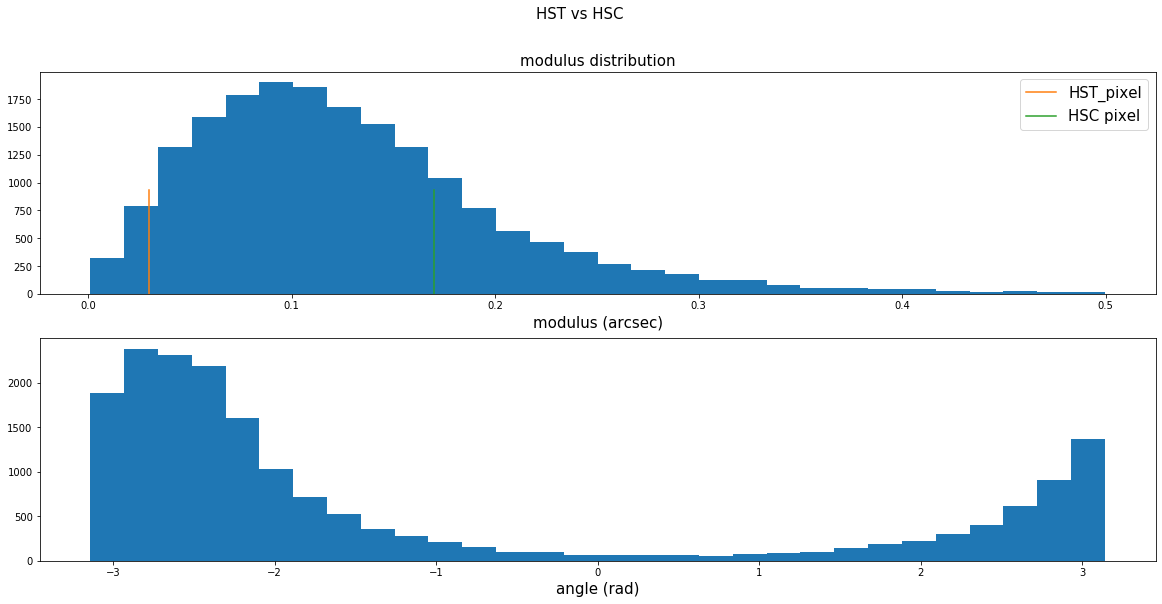

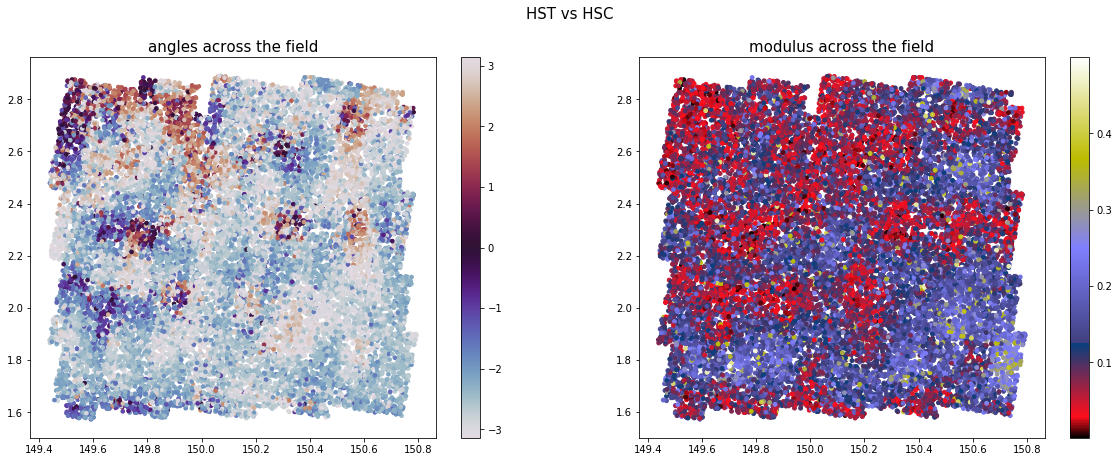

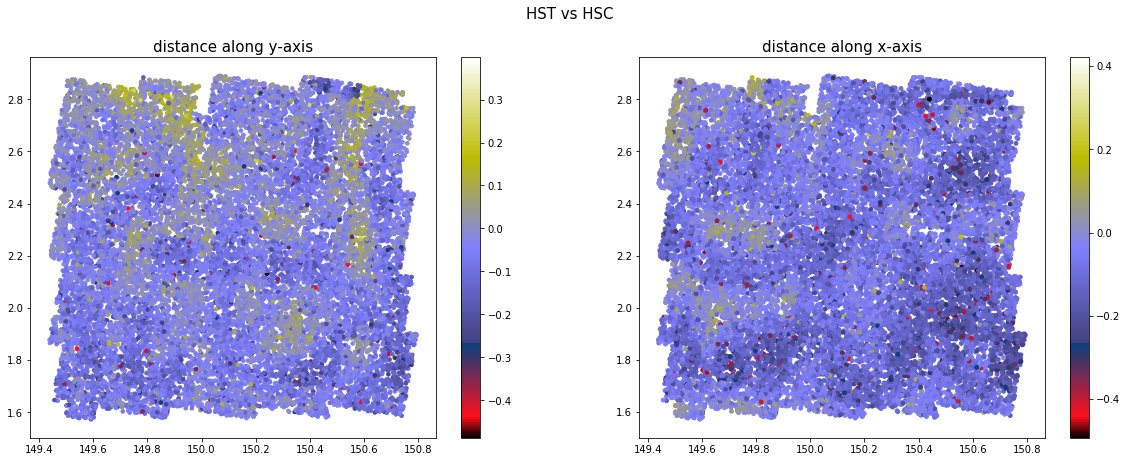

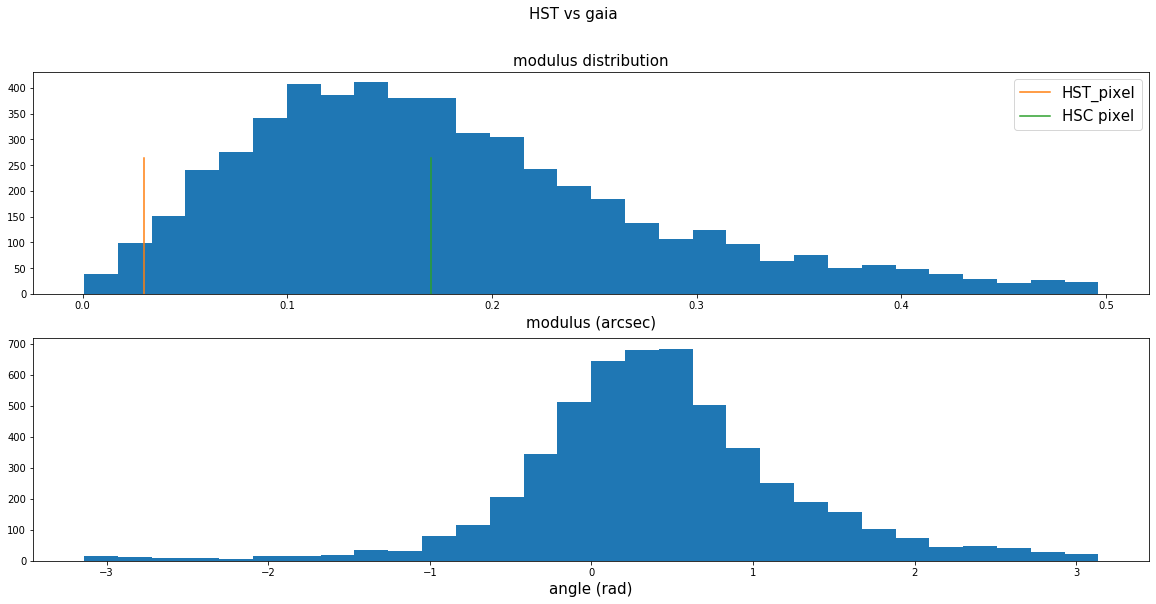

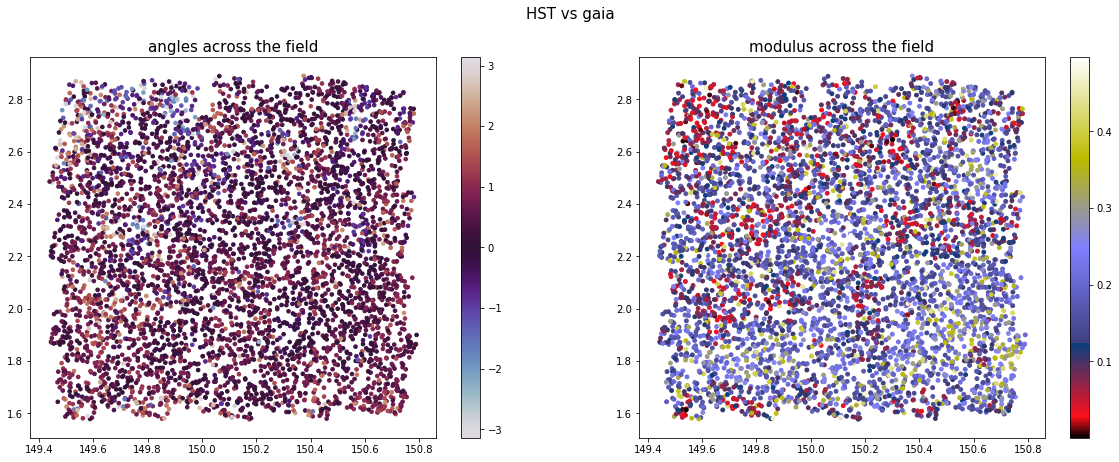

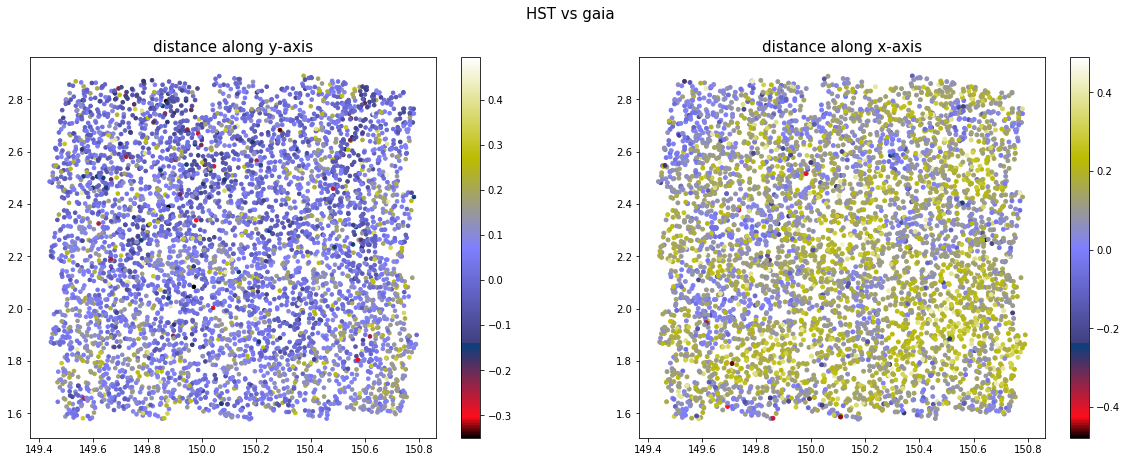

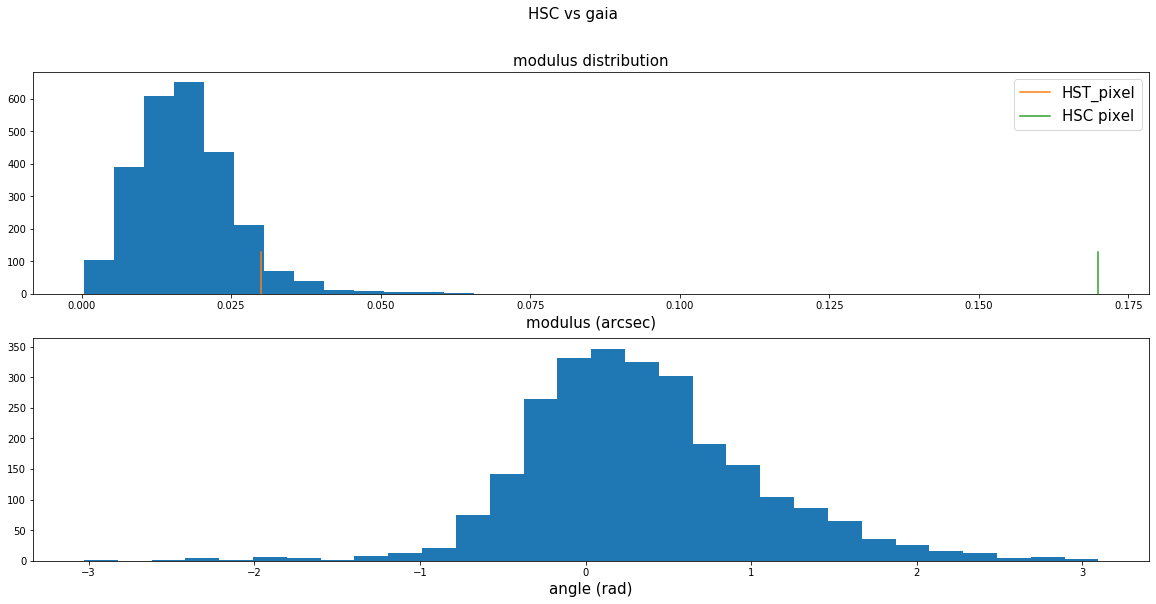

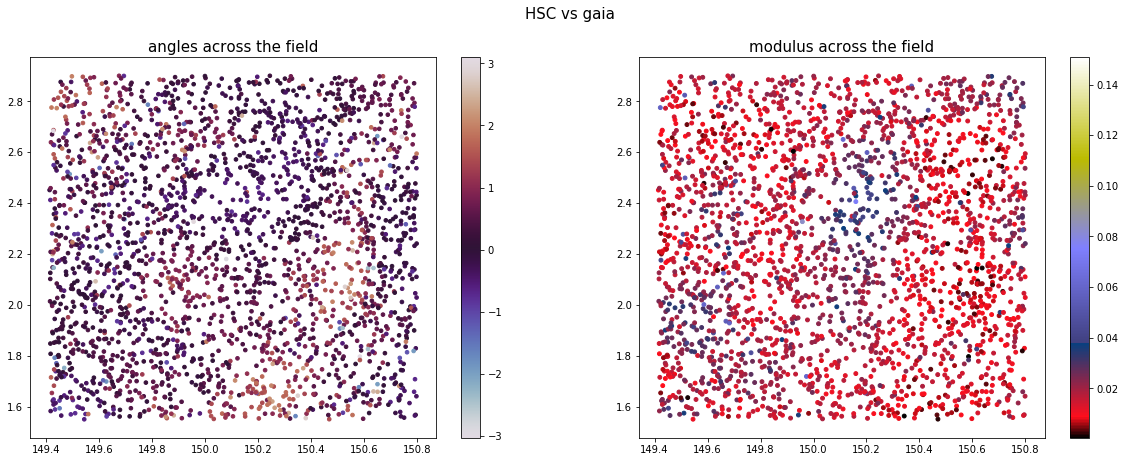

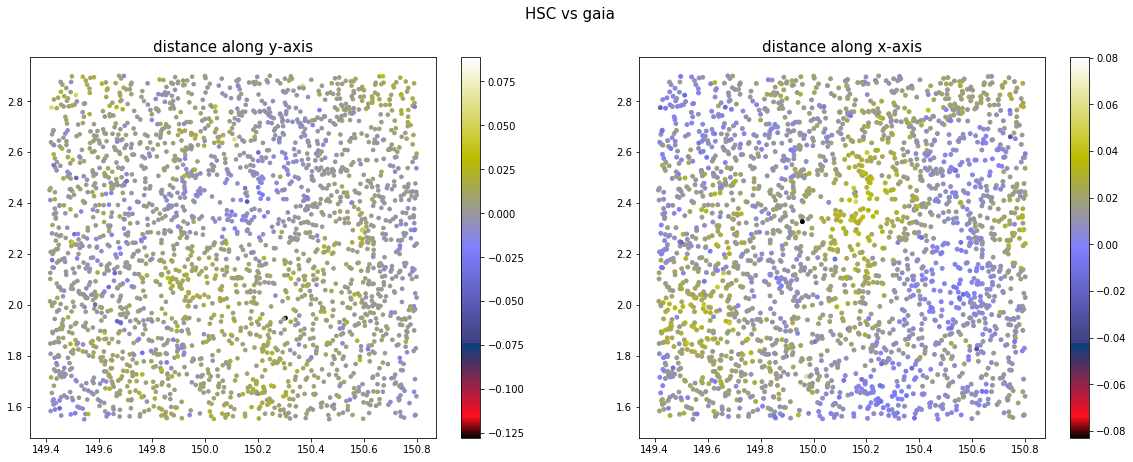

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20:

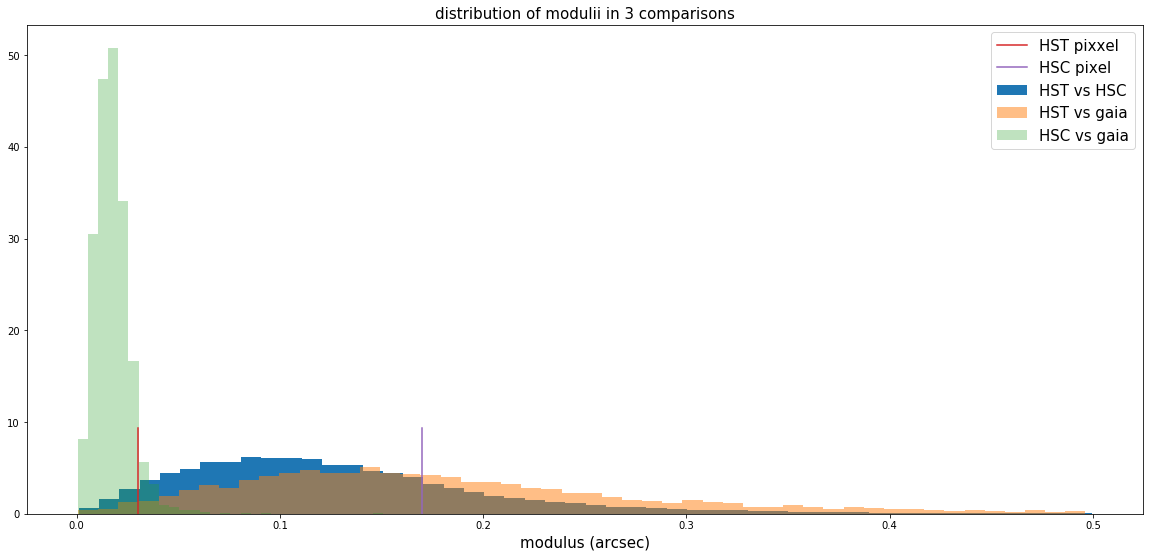

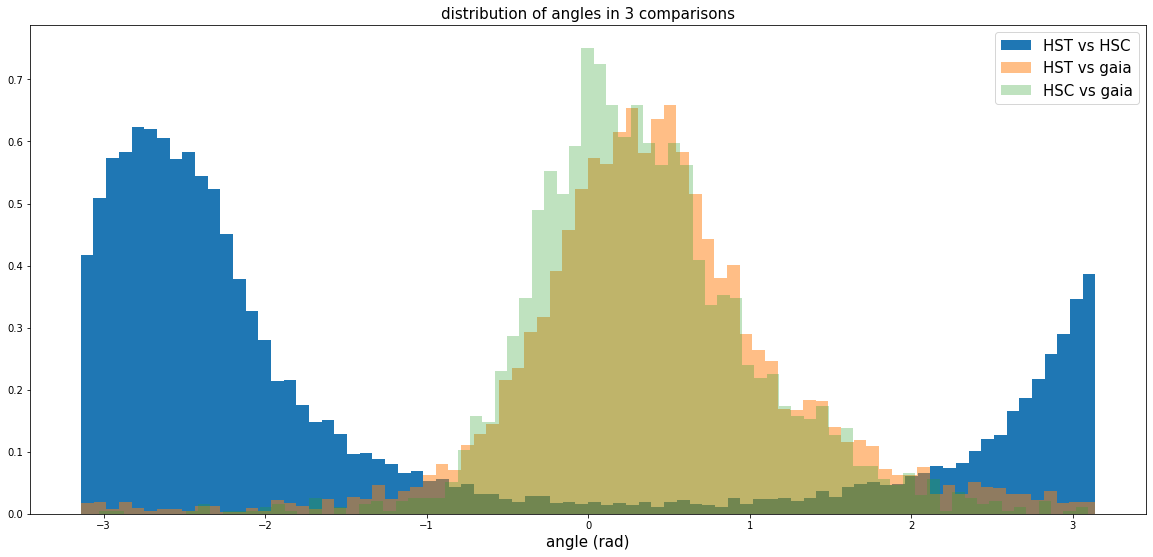

In [6]:
# Plots
at.plot_results(modulus_tc, angle_tc, xerr_tc, yerr_tc, v_coord_tc, pixel = [0.03, 0.17], label = ['HST_pixel', 'HSC pixel'], legend = 'HST vs HSC', init = 1, fontsize = 15)
at.plot_results(modulus_tg, angle_tg, xerr_tg, yerr_tg, v_coord_tg, pixel = [0.03, 0.17], label = ['HST_pixel', 'HSC pixel'], legend = 'HST vs gaia', init = 4, fontsize = 15)
at.plot_results(modulus_cg, angle_cg, xerr_cg, yerr_cg, v_coord_cg, pixel = [0.03, 0.17], label = ['HST_pixel', 'HSC pixel'], legend = 'HSC vs gaia', init = 7, fontsize = 15)
at.plt.show()

plt.figure(0, figsize=(20,9))
plt.title('distribution of modulii in 3 comparisons', fontsize = 15)
plt.hist(modulus_tc*3600., bins = 50, label = 'HST vs HSC', normed = True, alpha = 1)
plt.hist(modulus_tg*3600., bins = 50, label = 'HST vs gaia', normed = True, alpha = 0.5)
plt.hist(modulus_cg*3600., bins = 30, label = 'HSC vs gaia', normed = True, alpha = 0.3)
plt.plot([0.03, 0.03], [0, modulus_tc.size/2000.], label='HST pixxel')
plt.plot([0.17, 0.17], [0, modulus_tc.size/2000.], label='HSC pixel')
plt.xlabel('modulus (arcsec)', fontsize = 15)
plt.legend(fontsize = 15)

plt.figure(1, figsize=(20,9))
plt.title('distribution of angles in 3 comparisons', fontsize = 15)
plt.hist(angle_tc, bins = 80, label = 'HST vs HSC', normed = True, alpha = 1)
plt.hist(angle_tg, bins = 80, label = 'HST vs gaia', normed = True, alpha = 0.5)
plt.hist(angle_cg, bins = 80, label = 'HSC vs gaia', normed = True, alpha = 0.3)
plt.xlabel('angle (rad)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [7]:
#Make catallogs
with open('HST_astrometric_errors.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([["Ra (deg)", "Dec (deg)", "Modulus (deg)", "angle (rad)", "x_err (deg)", "y_err (deg)"]])
    writer.writerows(tab_HST)
with open('HSC_astrometric_errors.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([["Ra (deg)", "Dec (deg)", "Modulus (deg)", "angle (rad)", "x_err (deg)", "y_err (deg)"]])
    writer.writerows(tab_HSC)

[['149.9821980628089' '2.444899331071418']
 ['150.31515200338245' '2.556309445248274']
 ['149.84168834373642' '2.287722671171948']
 ...
 ['149.49884735730535' '2.782657122800666']
 ['149.52543162324406' '2.8518775652764736']
 ['149.5950337118114' '2.8623200350075044']]
(5269, 2) (1, 2)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
#This part is supposed to compute the error at given positions in the field for a given survey.
mod_hst = tab_HST[:,0]
angle_hst = tab_HST[:,1]
ra_hst = tab_HST[:,2]
dec_hst = tab_HST[:,3]
raoffset_hst = tab_HST[:,4]
decoffset_hst = tab_HST[:,5]

mod_hsc = tab_HSC[:,0]
angle_hsc = tab_HSC[:,1]
ra_hsc = tab_HSC[:,2]
dec_hsc = tab_HSC[:,3]
raoffset_hsc = tab_HSC[:,4]
decoffset_hsc = tab_HSC[:,5]

grid_pixel = 0.17*200/3600
grid_size = np.array([np.max(ra_hst-np.min(ra_hst)), np.max(dec_hst)-np.min(dec_hst)])/(grid_pixel)

ra_grid = np.linspace(np.min(ra_hst), np.max(ra_hst), grid_size[0])
dec_grid = np.linspace(np.min(dec_hst), np.max(dec_hst), grid_size[1])
ra_grid, dec_grid = np.meshgrid(ra_grid,dec_grid)

Grid = np.zeros(grid_size.astype(int))

plt.plot(ra_grid, dec_grid, 'or')
plt.plot(ra_hst, dec_hst, 'ob')
plt.show()
for i in range(dec_grid.size):
    i = 100
    r = ((ra_grid[i]-ra_hst)**2+(dec_grid[i]-dec_hst)**2)**0.5
    loc = r<grid_pixel
    print(ra_grid[i], dec_grid[i], ra_hst, dec_hst)
    Grid[ra_grid[i], dec_grid[i]] = np.mean(mod_hst[loc])